In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Models each apprentice's progress, including:

*   Milestone tracking
*   Work speed boosts
*   Spell effects
*   Daily production



In [11]:
class Apprentice:
    def __init__(self, name):
        self.name = name
        self.potions_made = 0
        self.work_speed = 1.0
        self.next_milestone = 10

    def update_milestone(self):
        if self.potions_made >= self.next_milestone:
            self.work_speed *= 1.07  # 7% boost
            self.next_milestone += 10

Simulated Wizard class with:

*   Cast spell
*   Passing day



In [12]:
class Wizard:
    def __init__(self, is_working=False):
        self.apprentices = [Apprentice(f"Apprentice_{i+1}") for i in range(3)]
        self.is_working = is_working
        self.daily_income = 0
        self.total_income = 0

    def cast_spells(self):
        # Randomly select 2 apprentices for each spell
        for spell in ['haste', 'empower', 'lady_luck']:
            targets = np.random.choice(self.apprentices, 2, replace=False)
            for apprentice in targets:
                if spell == 'haste':
                    apprentice.work_speed *= 1.18
                elif spell == 'empower':
                    self.daily_income += 100
                elif spell == 'lady_luck' and np.random.random() < 0.12:
                    self.daily_income += 1000  # Double output
                    apprentice.potions_made += 1

    def simulate_day(self, weekend=False):
        self.daily_income = 0

        # Reset work speed (spells wear off)
        for apprentice in self.apprentices:
            apprentice.work_speed = 1.0
            apprentice.update_milestone()

        # Cast daily spells
        if not weekend:
            self.cast_spells()

        # Calculate daily production
        for apprentice in self.apprentices:
            potions = np.floor(apprentice.work_speed)
            apprentice.potions_made += potions
            self.daily_income += potions * 1000

        # Add wizard's production if working
        if self.is_working:
            self.daily_income += 2000  # 2 potions per day

        self.total_income += self.daily_income
        return self.daily_income

In [13]:
# Define a running simulator function
def run_simulation(days=30, weekend_work=True, wizard_working=False):
    wizard = Wizard(is_working=wizard_working)
    daily_incomes = []

    for day in range(days):
        is_weekend = (day % 7) >= 5
        if is_weekend and not weekend_work:
            continue
        if is_weekend and weekend_work:
            wizard.total_income -= 7000  # Weekend overtime cost

        daily_income = wizard.simulate_day(weekend=is_weekend)
        daily_incomes.append(daily_income)

    return wizard.total_income, daily_incomes

In [20]:
# Define the function to calculate the outcome
def analyze_outcomes(n_simulations=5000, wizard_working=False, working_days = 30):
    totals = []
    for _ in range(n_simulations):
        total, _ = run_simulation(days=working_days, weekend_work=True, wizard_working=wizard_working)
        totals.append(total)

    # Calculate probability of reaching $1M
    prob_million = np.mean([t >= 1000000 for t in totals])

    # Create distribution plot
    plt.figure(figsize=(12, 6))
    sns.histplot(totals, kde=True)
    plt.axvline(x=1000000, color='r', linestyle='--', label='$1M Target')
    plt.title(f'Income Distribution {"(With Wizard Working)" if wizard_working else ""}')
    plt.xlabel('Total Income ($)')
    plt.ylabel('Frequency')
    plt.legend()

    # Add statistics
    mean_income = np.mean(totals)
    std_income = np.std(totals)

    print(f"\nSimulation Results {'(With Wizard Working)' if wizard_working else ''}:")
    print(f"Probability of reaching $1M: {prob_million:.2%}")
    print(f"Mean income: ${mean_income:,.2f}")
    print(f"Standard deviation: ${std_income:,.2f}")
    print(f"5th percentile: ${np.percentile(totals, 5):,.2f}")
    print(f"95th percentile: ${np.percentile(totals, 95):,.2f}")

    plt.show()
    return totals

Scenario 1: Without Wizard Working

Simulation Results :
Probability of reaching $1M: 0.00%
Mean income: $399,700.80
Standard deviation: $6,768.05
5th percentile: $389,000.00
95th percentile: $411,000.00


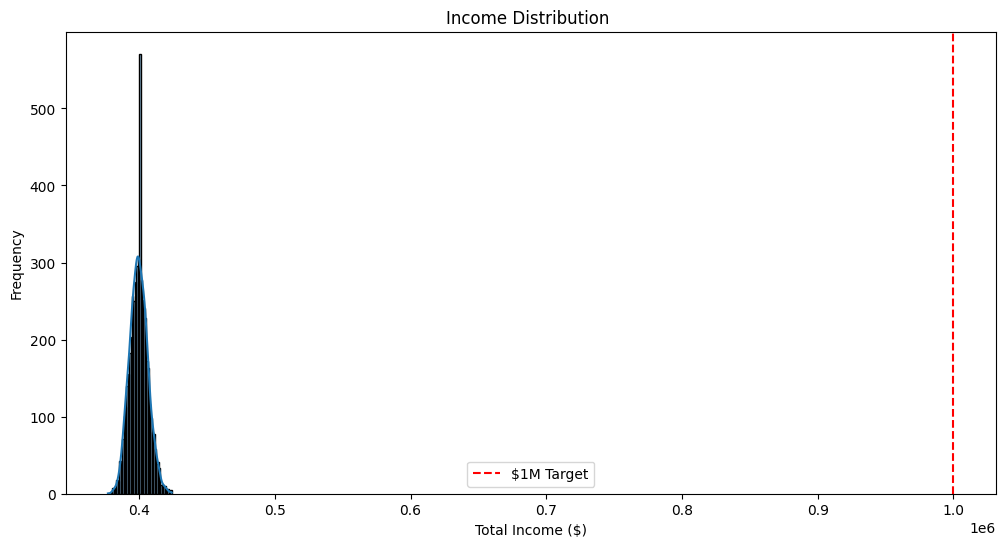

In [21]:
print("Scenario 1: Without Wizard Working")
totals_1 = analyze_outcomes(working_days = 300)


Scenario 2: With Wizard Working

Simulation Results (With Wizard Working):
Probability of reaching $1M: 49.88%
Mean income: $999,627.00
Standard deviation: $6,704.71
5th percentile: $989,000.00
95th percentile: $1,011,000.00


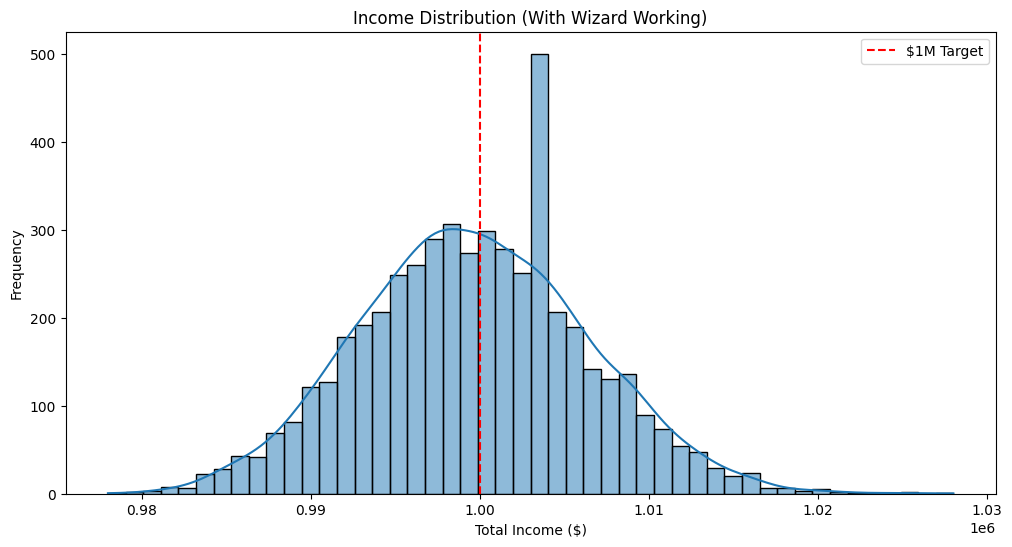

In [22]:
print("\nScenario 2: With Wizard Working")
totals_2 = analyze_outcomes(wizard_working=True, working_days = 300)

In [23]:
# Sample daily operation (first 5 days)
def show_daily_operation(wizard_working=False, working_days = 7):
    _, daily_incomes = run_simulation(days=working_days, wizard_working=wizard_working)
    print(f"\nDaily Operation Sample {'(With Wizard Working)' if wizard_working else ''}:")
    for day, income in enumerate(daily_incomes, 1):
        print(f"Day {day}: ${income:,.2f}")

In [25]:
show_daily_operation(wizard_working=False, working_days = 15)
show_daily_operation(wizard_working=True, working_days = 15)


Daily Operation Sample :
Day 1: $4,200.00
Day 2: $3,200.00
Day 3: $3,200.00
Day 4: $3,200.00
Day 5: $3,200.00
Day 6: $3,000.00
Day 7: $3,000.00
Day 8: $3,200.00
Day 9: $3,200.00
Day 10: $3,200.00
Day 11: $3,200.00
Day 12: $3,200.00
Day 13: $3,000.00
Day 14: $3,000.00
Day 15: $3,200.00

Daily Operation Sample (With Wizard Working):
Day 1: $5,200.00
Day 2: $6,200.00
Day 3: $5,200.00
Day 4: $5,200.00
Day 5: $5,200.00
Day 6: $5,000.00
Day 7: $5,000.00
Day 8: $6,200.00
Day 9: $5,200.00
Day 10: $5,200.00
Day 11: $5,200.00
Day 12: $6,200.00
Day 13: $5,000.00
Day 14: $5,000.00
Day 15: $5,200.00
